<a href="https://colab.research.google.com/github/sournara/Computer_Vision_Study/blob/main/TensorFlow/TensorFlow_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **데이터 세트 다운로드**
- 딥러닝 모델 학습 과정에서 필요한 데이터 세트를 불러온다.

In [ ]:
!git clone https://github.com/ndb796/weather_dataset
%cd weather_dataset

Cloning into 'weather_dataset'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1117 (delta 0), reused 3 (delta 0), pack-reused 1111
Receiving objects: 100% (1117/1117), 85.23 MiB | 12.19 MiB/s, done.
/content/weather_dataset


### **라이브러리 불러오기(Load Libraries)**
- 딥러닝 모델 학습 과정에서 필요한 라이브러리를 불러온다.

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

### **데이터 세트 불러오기(Load Dataset)**
1. **데이터 증진(data augmentation)**을 명시하여 초기화할 수 있다.
    - 이미지를 불러올 때 어떤 방법(회전, 자르기, 뒤집기 등)을 사용할 것인지 명시한다.
2. 이후에 **flow()**를 이용하여 실질적으로 데이터를 불러올 수 있다.
    - 어떤 데이터를 사용할 것인지, 배치 크기(batch size), 데이터 셔플(shuffle) 여부 등을 명시한다.
    - **next() 함수**를 이용하여 numpy array 형태로 데이터를 배치 단위로 얻을 수 있다.

- **Reference** : https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

In [11]:
train_generator = ImageDataGenerator(
    rescale = 1 / 255.,
    horizontal_flip = True,
    validation_split = 0.2
)
test_generator = ImageDataGenerator(rescale = 1 / 255.)

train_flow = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle = True,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64,
    subset = "training"
)
val_flow = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle = True,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64,
    subset = "validation"
)
test_flow = test_generator.flow_from_directory(
    directory = 'test/',
    shuffle = False,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64
)

Found 676 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


### **데이터 시각화(Data Visualization)**

['Cloudy', 'Cloudy', 'Cloudy', 'Sunrise']


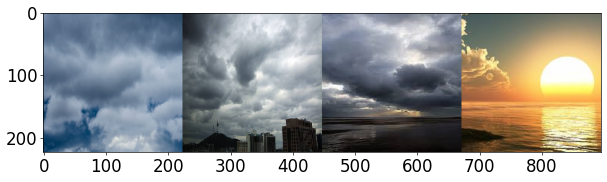

In [13]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size' : 20})

class_names = {
    0 : "Cloudy",
    1 : "Rain",
    2 : "Shine",
    3 : "Sunrise"
}

images, targets = next(train_flow)

print([class_names[x] for x in np.argmax(targets[:4], axis = 1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis = 1))
plt.show()

### **딥러닝 모델 학습(Training)**
- 사전 학습된(pre-trained) 모델을 이용하여 가지고 있는 데이터 세트에 대한 학습이 가능하다.
    - **include_top** : 네트워크 뒤에 FC(fully-connected) 레이어를 포함하는지 여부
    - **weights** : None 혹은 'imagenet'
    - 네트워크의 마지막에 FC 레이어를 적용하여 클래스 개수를 일치시킨다.

In [18]:
model = Sequential()
pretrained_model = InceptionV3(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
#model.summary()

In [20]:
learning_rate = 0.001

# 학습 준비 단계(compile)
model.compile(
    optimizer = optimizers.SGD(learning_rate = learning_rate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
# 학습 수행
history = model.fit(
    train_flow,
    epochs = 15,
    validation_data = val_flow
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.3400 - loss: 1.5008 - val_accuracy: 0.4881 - val_loss: 1.2037
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.6755 - loss: 0.8264 - val_accuracy: 0.5357 - val_loss: 1.1038
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 498ms/step - accuracy: 0.8347 - loss: 0.5508 - val_accuracy: 0.5179 - val_loss: 1.0160
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 520ms/step - accuracy: 0.8760 - loss: 0.4201 - val_accuracy: 0.7083 - val_loss: 0.7660
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - accuracy: 0.9327 - loss: 0.2998 - val_accuracy: 0.7024 - val_loss: 0.7557
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 497ms/step - accuracy: 0.9420 - loss: 0.2401 - val_accuracy: 0.7381 - val_loss: 0.6410
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 514ms/step - accuracy: 0.9482 - loss: 0.2369 - val_accuracy: 0.7500 - val_loss: 0.6280
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - accuracy: 0.9738 - loss: 0.1716 - val_accuracy: 0.8095 - va

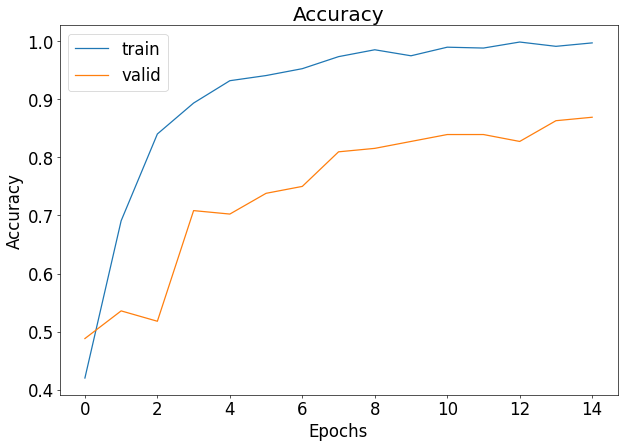

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

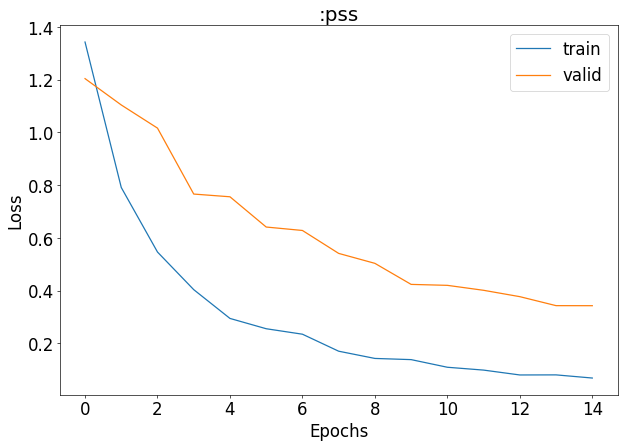

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title(':pss')
plt.legend(['train', 'valid'])
plt.show()

In [23]:
# 학습된 모델 테스트
test_history = model.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss : {test_loss:.8f}")
print(f"Test accuracy : {test_accuracy * 100.:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8995 - loss: 0.3270
Test loss : 0.30206582
Test accuracy : 90.75%
